<center><h1>Identifikation der Attribute</h1></center>

# 0. Set-Up


The necessary modules are imported.

In [2]:
#! pip install scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from itertools import product

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# The excel file which includes all attributes is read.
data_path = '/content/drive/MyDrive/SuperBowl_Project_FUB/Colab_Notebooks/Flavio_ML_Model/End_Datei.xlsx'
data = pd.read_excel(data_path)

# 1. Business Understanding

## 1.1	Domain Knowledge

Super Bowl ads have become an iconic cultural phenomenon, known for their creativity, high production value, and the ability to capture the attention of millions of viewers during the prestigious sporting event.

Every year, following the Super Bowl, these ads are assessed based on various criteria, proving crucial for marketing researchers who analyze brand perception, resulting brand popularity, purchase intent, and the attributes that characterize a brand or product.

## 1.2	Project Goal

The goal of this project is to identify the columns that have the most significant impact on the popularity or rating of respective commercials based on the "USATodayAdMeter" attribute.

# 2. Data Understanding

## 2.1	Project Structure



In this project, a dataset has been utilized that comprises details regarding Super Bowl advertisements spanning from 2013 to 2022. This file includes meta-attributes, data on video complexity, as well as manually coded attributes provided, along with attributes generated through the analysis of visuals and audio in commercials.

## 2.2	Fields Understanding

We firstly decided to look at the structure of the given data.

In [ ]:
data.shape

(550, 494)

In [ ]:
data.head()

,AdNumber,Sponsor,BRAND,AdTitle,AdNumber.1,iSpot.tv,Comment,Length,Quarter,USATodayAdMeter,...,Total_Speaking_Time_Seconds,Total_Speaking_Time_Percent,Male_Speaking_Time_Seconds,Male_Speaking_Time_Percent,Female_Speaking_Time_Seconds,Female_Speaking_Time_Percent,Emotion_from_Dialogue,Acoustic_Complexity_Index__main_value,RMS_energy__mean,compression_ratio_per_second
0,AD0252,Audi,Audi,Prom,AD0252,x,NaN,60,1,6.64,...,13.056027,21.346283,11.222411,85.955787,1.833616,14.044213,joy,2208.604983,0.014519,1.430401
1,AD0253,Axe,Axe,Lifeguard,AD0253,x,NaN,30,3,4.33,...,6.061121,21.045557,6.061121,100.000000,0.000000,0.000000,joy,982.091066,0.021984,3.037449
2,AD0254,Best Buy,BestBuy,Asking Amy Poehler,AD0254,x,NaN,30,1,6.23,...,24.312394,85.495636,21.120543,86.871508,3.191851,13.128492,fear,1039.901785,0.017015,3.076135
3,AD0255,Blackberry,BlackBerry,My new Blackberry,AD0255,x,NaN,30,3,5.16,...,14.617997,51.097583,14.617997,100.000000,0.000000,0.000000,joy,1029.012771,0.019414,3.057829
4,AD0256,Budweiser,Beck's Beer,Beck's Sapphire fish singing,AD0256,x,BRAND = Becks ?,30,3,3.66,...,9.066214,32.049682,9.015280,99.438202,0.050934,0.561798,joy,1006.312035,0.017803,3.092287


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 494 entries, AdNumber to compression_ratio_per_second
dtypes: float64(422), int64(59), object(13)
memory usage: 2.1+ MB


## 2.3	Data Quality

### 2.3.1 Complete Attribute Values

This step refers to the absence of missing or null values within a specific
attribute or column of a dataset.

In [ ]:
data.isnull().sum()

AdNumber                                  0
Sponsor                                   0
BRAND                                     0
AdTitle                                   0
AdNumber.1                                0
                                         ..
Female_Speaking_Time_Percent             16
Emotion_from_Dialogue                    16
Acoustic_Complexity_Index__main_value    16
RMS_energy__mean                         16
compression_ratio_per_second             16
Length: 494, dtype: int64

### 2.3.2 Unbalanced data

In [ ]:
data['Kelloggs'] = data['Kelloggs'].str.upper()

kellogs_rating = data['Kelloggs'].value_counts().reset_index()
kellogs_rating.columns = ['Kellogs Rating', 'Count']
kellogs_rating = kellogs_rating.sort_values(by='Count', ascending=False)
kellogs_rating['Percentage'] = (kellogs_rating['Count'] / kellogs_rating['Count'].sum()) * 100

kellogs_rating

,Kellogs Rating,Count,Percentage
0,C,198,36.000000
1,B,173,31.454545
2,A,85,15.454545
3,D,68,12.363636
4,-,19,3.454545
5,F,7,1.272727


In [ ]:
# Define a function to check if a value is numeric and round it
def round_if_numeric(value):
    try:
        return round(float(value))
    except ValueError:
        return value

USATodayAdMeter_rating = data['USATodayAdMeter'].apply(round_if_numeric)

USATodayAdMeter_rating = USATodayAdMeter_rating.value_counts().reset_index()
USATodayAdMeter_rating.columns = ['USATodayAdMeter Rating', 'Count']
USATodayAdMeter_rating = USATodayAdMeter_rating.sort_values(by='Count', ascending=False)
USATodayAdMeter_rating['Percentage'] = (USATodayAdMeter_rating['Count'] / USATodayAdMeter_rating['Count'].sum()) * 100

USATodayAdMeter_rating

,USATodayAdMeter Rating,Count,Percentage
0,6,205,37.272727
1,5,197,35.818182
2,4,75,13.636364
3,7,56,10.181818
4,3,9,1.636364
5,8,7,1.272727
6,-,1,0.181818


The data is not balanced.

### 2.3.3 Timeliness

Show the date range.

In [ ]:
start_date = data['Year'].min()
end_date = data['Year'].max()
print("Date Range: {} - {}".format(start_date, end_date))

Date Range: 2013 - 2022


Show the number of ads per year.

In [ ]:
ads_per_year = data['Year'].value_counts().sort_index()
ads_per_year

2013    49
2014    55
2015    53
2016    57
2017    58
2018    57
2019    52
2020    55
2021    54
2022    60
Name: Year, dtype: int64

## 2.4	Data Visualisation

### 2.4.1 Low dimentional relationships

#### 2.4.1.1 Univariate Analysis

In [13]:
# Create a histogram to visualize the distribution
def visualise_attribute(attribute):
  sns.histplot(data[f'{attribute}'], kde=True, color='skyblue', edgecolor='black')
  plt.title(f'Distribution of {attribute}')
  plt.xlabel(f'{attribute}')
  plt.ylabel('Frequency')
  plt.show()

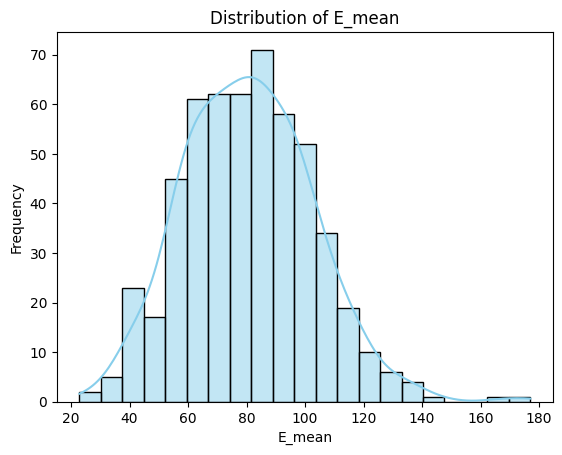

In [15]:
# Example of visualisation
visualise_attribute('E_mean')

#### 2.4.2 Bivariate Analysis

In [24]:
# Create a histogram to visualize the distribution
def visualise_bivariate_attributes(attribute1, attribute2):
  plt.hist(data[attribute1], bins=20, color='skyblue', alpha=0.7, label=attribute1)
  plt.hist(data[attribute2], bins=20, color='lightcoral', alpha=0.7, label=attribute2)

  plt.title('Distribution of {} and {}'.format(attribute1, attribute2))
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.legend()

  plt.show()

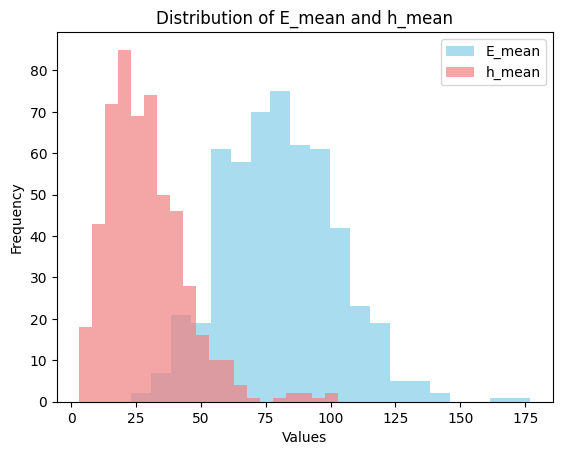

In [25]:
# Example of visualisation
visualise_bivariate_attributes('E_mean', 'h_mean')

# 3. Data Preperation

## 3.1 Data Selection

### 3.2.1 Feature Extraction

No relevant features could be extracted from the attributes.

### 3.2.2 Feature Selection

Feature Selection entails utilizing methods to select a minimal subset of features that remains adequate for effective data analysis.

#### 3.2.2.1 Remove Duplicate Rows

In [ ]:
duplicate_rows = data.duplicated()
data = data[~duplicate_rows]
print("Number of Duplicate Rows:", duplicate_rows.sum())
print("DataFrame shape after removing duplicates:", data.shape)

Number of Duplicate Rows: 0
DataFrame shape after removing duplicates: (550, 494)


#### 3.2.2.1 Remove Irrelevant Features

Remove irrelevant Meta Attributes

In [ ]:
data = data.drop(columns=['AdNumber', 'BRAND', 'AdNumber.1', 'Sponsor', 'AdTitle', 'iSpot.tv', 'Comment', 'Kelloggs', 'AdNumber.2', 'Coder', 'Year', 'h_min', 'FrameCount'])

Remove other irrelevant columns

NOTE: The super categories (settings) are removed since this information is already included in the columns (object)_count. Whereas the Speaking time in seconds is removed because it is already shown as a percentage which is better for the model.

In [ ]:
data = data.drop(columns=['super_category_person_count', 'super_category_accessory_count', 'super_category_kitchen_count', 'super_category_animal_count', 'super_category_furniture_count', 'super_category_food_count', 'super_category_electronic_count',
                          'super_category_indoor_count', 'super_category_vehicle_count', 'super_category_outdoor_count', 'super_category_sports_count', 'super_category_appliance_count', 'Total_Speaking_Time_Seconds', 'Male_Speaking_Time_Seconds', 'Female_Speaking_Time_Seconds'])

NOTE: Here we removed the attributes that shouldn't be important for the predicion.

In [ ]:
prefixes_to_remove = ['bicycle', 'bus', 'train', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
                      'bench', 'bird', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                      'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
                      'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'wine glass', 'cup', 'fork',
                      'knife', 'spoon', 'bowl', 'banana', 'apple', 'orange', 'broccoli', 'carrot', 'hot dog', 'cake',
                      'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'mouse', 'remote', 'microwave',
                      'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
                      'hair drier', 'toothbrush', 'motorcycle', 'airplane', 'truck', 'boat', 'sandwich', 'pizza',
                      'donut', 'tv', 'laptop', 'keyboard']

# Filtering columns that do not start with the specified prefixes
data = data.loc[:, ~data.columns.str.startswith(tuple(prefixes_to_remove))]

In [ ]:
columns_to_remove = [col for col in data.columns if col.startswith(("neutral", "happy", "sad", "angry", "fear", "surprise")) and not col.endswith("_count")]

# Create a new DataFrame without the specified columns
data = data.drop(columns=columns_to_remove)

## 3.2 Data Cleaning


### 3.2.1 Missing Values

The missing values in this care are Missing at Completely Random (MCAR) because they do not depend on other attributes. Therefore the choosen solution in this case is to amputate the ads which contain these missing values from the analysis.

#### 3.2.1.1 Quarter

In [ ]:
data = data.dropna(subset=['Quarter'])
data.shape

(549, 164)

#### 3.2.1.2 Video Complexity Data

Here we can only drop the rows of one of the Columns since the empty values are the same

In [ ]:
data = data.dropna(subset=['E_mean'])
data.shape

(534, 164)

#### 3.2.1.3 Rating

In [ ]:
data = data[data['USATodayAdMeter'] != "-"]
data.shape

(533, 164)

#### 3.2.1.3 Empty Cells to Zero

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.isnull().sum().sum()

0

## 3.3 Data Transformation and Normalization

### 3.3.1 Length

In [ ]:
# Transform the length into 15-Second intervalls
new_length = data['Length'].value_counts().reset_index()
new_length.columns = ['Length', 'Count']
new_length = new_length.sort_values(by='Count', ascending=False)
new_length['Percentage'] = (new_length['Count'] / new_length['Count'].sum()) * 100

new_length

,Length,Count,Percentage
0,30,285,53.470919
1,60,180,33.771107
2,15,26,4.878049
3,45,17,3.189493
4,90,12,2.251407
5,120,7,1.313321
6,95,1,0.187617
7,103,1,0.187617
8,75,1,0.187617
9,50,1,0.187617


### 3.3.2 Quarter

NOTE: HAT and HT both mean Halftime, meaning between the second and third quarter, and PG means Pregame, which is before the first quarter.

In [26]:
# Transform quarter into numerical values
quarter_mapping = {'HAT': 2.5, 'HT': 2.5, 'PG': 0.5, 'PK':4.5}
data['Quarter'].replace(to_replace=quarter_mapping.keys(), value=quarter_mapping.values(), inplace=True)

### 3.3.3 USATodayAdMeter

In [ ]:
# Round the rating
data['USATodayAdMeter'] = data['USATodayAdMeter'].apply(round_if_numeric)

### 3.3.4 Video Complexity

#### 3.3.4.1 Spatial Complexity

In [ ]:
# Normalise the values
data['E_mean'] = (data['E_mean'] - data['E_mean'].min()) / (data['E_mean'].max() - data['E_mean'].min())
data['E_std'] = (data['E_std'] - data['E_std'].min()) / (data['E_std'].max() - data['E_std'].min())
data['E_max'] = (data['E_max'] - data['E_max'].min()) / (data['E_max'].max() - data['E_max'].min())
data['E_min'] = (data['E_min'] - data['E_min'].min()) / (data['E_min'].max() - data['E_min'].min())

#### 3.3.4.1 Tempolar Complexity

In [ ]:
# Normalise the values
data['h_mean'] = (data['h_mean'] - data['h_mean'].min()) / (data['h_mean'].max() - data['h_mean'].min())
data['h_std'] = (data['h_std'] - data['h_std'].min()) / (data['h_std'].max() - data['h_std'].min())
data['h_max'] = (data['h_max'] - data['h_max'].min()) / (data['h_max'].max() - data['h_max'].min())

### 3.3.4 Other Attributes

In [ ]:
# Normalise the values
columns_to_normalize = data.columns[60:]

for column in columns_to_normalize:
    if column != 'Emotion_from_Dialogue':
        # Calculate min and max for the current column
        min_value = data[column].min()
        max_value = data[column].max()

        # Apply min-max normalization to each cell in the column
        data[column] = data[column].apply(lambda x: (x - min_value) / (max_value - min_value))

### 3.3.6 Inserting dummy variables for the non-binary Attributes

In [ ]:
data = pd.get_dummies(data, columns=['Emotion_from_Dialogue'], drop_first=True)

In [ ]:
columns_to_dummy = [col for col in data.columns if col.startswith('cont_')]

for col in columns_to_dummy:
    unique_values = data[col].unique()
    if len(unique_values) > 2 or not all(val in [0, 1] for val in unique_values):
        data = pd.get_dummies(data, columns=[col], drop_first=True)

# 4. Modelling

## 4.1 Attribute Selection

In the following step the results of the Random Forest Classifier Model will be compared for 3 different sets of attributes.

### 4.1.1 Only the manually coded attributes + Length + Quarter

In [ ]:
# Keeping only relevant attributes
manual_columns = [
    col for col in data.columns
    if col.startswith('cont_') or
    col in ['USATodayAdMeter'] or
    col.startswith('Length') or col.startswith('Quarter')]

# Create a new DataFrame with only the selected columns
data_manual = data[manual_columns]

y_manual = data_manual['USATodayAdMeter']
X_manual = data_manual.drop(columns=['USATodayAdMeter'])

### 4.1.2 Only the attributes created from this project

In [ ]:
# Columns to exclude
columns_to_exclude = [
    col for col in data.columns
    if col.startswith('cont_') or
    col.startswith('Length') or col.startswith('Quarter')]

# Create a new DataFrame excluding specified columns
data_project = data.drop(columns=columns_to_exclude)

y_project = data_project['USATodayAdMeter']
X_project = data_project.drop(columns=['USATodayAdMeter'])

### 4.1.3 Combination of all the attributes

In [ ]:
y_all = data['USATodayAdMeter']
X_all = data.drop(columns=['USATodayAdMeter'])

## 4.2 Finding the best hyperparameters

### 4.2.1 Function

In [ ]:
# Define selected values for testing
selected_n_estimators_values = [50, 100, 150]
selected_max_depth_values = [5, 10, 15]
selected_min_samples_split_values = [5, 10, 15]
selected_max_features_values = [0.3, 0.6, 'sqrt']
bootstrap_options = [True, False]
criterion_options = ['gini', 'entropy']

In [ ]:
def find_best_hyperparameters(X, y):
    # Combine hyperparameters for iteration
    hyperparameter_combinations = product(selected_n_estimators_values, selected_max_depth_values,
                                          selected_min_samples_split_values, selected_max_features_values,
                                          bootstrap_options, criterion_options)

    # Initialize variables to store the best metrics
    best_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'combination_metrics': 0}
    best_params = {metric: {} for metric in best_metrics}

    # Iterate over selected hyperparameter combinations
    for params in hyperparameter_combinations:
        n_estimators, max_depth, min_samples_split, max_features, bootstrap, criterion = params

        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            max_features=max_features,
            bootstrap=bootstrap,
            criterion=criterion,
            random_state=42
        )

        # Perform cross-validation and calculate mean scores
        cv = KFold(n_splits=10, shuffle=True, random_state=42)
        scores = {
            'accuracy': np.mean(cross_val_score(rf_classifier, X, y, cv=cv, scoring=make_scorer(accuracy_score))),
            'precision': np.mean(cross_val_score(rf_classifier, X, y, cv=cv, scoring=make_scorer(precision_score, average='weighted', zero_division=1))),
            'recall': np.mean(cross_val_score(rf_classifier, X, y, cv=cv, scoring=make_scorer(recall_score, average='weighted', zero_division=1))),
            'f1': np.mean(cross_val_score(rf_classifier, X, y, cv=cv, scoring=make_scorer(f1_score, average='weighted'))),
        }

        scores['combination_metrics'] = sum(scores.values())

        # Check if current combination resulted in better metrics
        for metric in best_metrics:
            if scores[metric] > best_metrics[metric]:
                best_metrics[metric] = scores[metric]
                best_params[metric] = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'max_features': max_features,
                    'bootstrap': bootstrap,
                    'criterion': criterion
                }

    # Return the best hyperparameters and metrics for each evaluation metric
    result = {}
    for metric in best_metrics:
        result[f"best_{metric}"] = best_metrics[metric]
        result[f"{metric}_params"] = best_params[metric]

    return result

### 4.2.2 Manual coded attributes

In [ ]:
best_hyperparameters = find_best_hyperparameters(X_manual, y_manual)
for param, value in best_hyperparameters.items():
  print(param)
  print(value)

best_accuracy
0.5010482180293502
accuracy_params
{'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'max_features': 0.3, 'bootstrap': False, 'criterion': 'entropy'}
best_precision
0.6504647421644945
precision_params
{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}
best_recall
0.5010482180293502
recall_params
{'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'max_features': 0.3, 'bootstrap': False, 'criterion': 'entropy'}
best_f1
0.45002631001274096
f1_params
{'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 10, 'max_features': 0.3, 'bootstrap': False, 'criterion': 'entropy'}
best_combination_metrics
2.0702587452502015
combination_metrics_params
{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}


In [ ]:
best_params_manual = {
    'n_estimators': 50,
    'max_depth': 5,
    'min_samples_split': 5,
    'max_features': 'sqrt',
    'bootstrap': False,
    'criterion': 'entropy'
}

### 4.2.3 New inserted attributes

In [ ]:
best_hyperparameters = find_best_hyperparameters(X_project, y_project)
for param, value in best_hyperparameters.items():
  print(param)
  print(value)

best_accuracy
0.5012229210342418
accuracy_params
{'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 0.3, 'bootstrap': False, 'criterion': 'entropy'}
best_precision
0.646965677622214
precision_params
{'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}
best_recall
0.5012229210342418
recall_params
{'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 0.3, 'bootstrap': False, 'criterion': 'entropy'}
best_f1
0.4551922062543257
f1_params
{'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 0.6, 'bootstrap': False, 'criterion': 'entropy'}
best_combination_metrics
2.082342871928124
combination_metrics_params
{'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 0.3, 'bootstrap': False, 'criterion': 'entropy'}


In [ ]:
best_params_project = {
    'n_estimators': 150,
    'max_depth': 5,
    'min_samples_split': 5,
    'max_features': 0.3,
    'bootstrap': False,
    'criterion': 'entropy'
}

### 4.2.4 Combination of all

In [ ]:
best_hyperparameters = find_best_hyperparameters(X_all, y_all)
for param, value in best_hyperparameters.items():
  print(param)
  print(value)

best_accuracy
0.506638714185884
accuracy_params
{'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}
best_precision
0.6536910187580866
precision_params
{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}
best_recall
0.506638714185884
recall_params
{'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}
best_f1
0.4509258469012304
f1_params
{'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}
best_combination_metrics
2.084374389846621
combination_metrics_params
{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}


In [ ]:
best_params_all = {
    'n_estimators': 50,
    'max_depth': 5,
    'min_samples_split': 5,
    'max_features': 'sqrt',
    'bootstrap': True,
    'criterion': 'entropy'
}

## 4.3 Finding the most important features

### 4.3.1 Function

In [ ]:
def important_attributes(X, y, best_params):
    # Create and train the Random Forest Classifier with best hyperparameters
    rf_classifier = RandomForestClassifier(
        n_estimators=best_params.get('n_estimators'),
        max_depth=best_params.get('max_depth'),
        min_samples_split=best_params.get('min_samples_split'),
        max_features=best_params.get('max_features'),
        bootstrap=best_params.get('bootstrap'),
        criterion=best_params.get('criterion'),
        random_state=42)

    # Feature Importance
    rf_classifier.fit(X, y)
    feature_importance_rf = rf_classifier.feature_importances_

    # Sort indices by importance
    sorted_indices_rf = feature_importance_rf.argsort()[::-1]

    # Print features and their indices
    print("Top Feature Importance:")
    top_features_count = 10
    for i in range(top_features_count):
        feature_index = sorted_indices_rf[i]
        feature_name = X.columns[feature_index]
        feature_importance = feature_importance_rf[feature_index]
        print(f"{i + 1}. Feature: {feature_name}, Importance: {round(feature_importance, 2)*100}%")

    # Plotting Feature Importance
    plt.figure(figsize=(25, 6))
    plt.bar(range(top_features_count), feature_importance_rf[sorted_indices_rf][:top_features_count], align='center')
    plt.xticks(range(top_features_count), X.columns[sorted_indices_rf][:top_features_count], rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Random Forest Classifier - Top Feature Importance')
    plt.show()

### 4.3.2 Manual coded attributes

Top Feature Importance:
1. Feature: Length, Importance: 15.0%
2. Feature: cont_com_appeal_3, Importance: 7.000000000000001%
3. Feature: cont_charac_child, Importance: 4.0%
4. Feature: cont_brand_diff, Importance: 4.0%
5. Feature: cont_charac_male, Importance: 4.0%
6. Feature: cont_primary_product_type_5, Importance: 3.0%
7. Feature: cont_setting_6, Importance: 3.0%
8. Feature: cont_com_appeal_2, Importance: 3.0%
9. Feature: cont_relation_caucas_1, Importance: 2.0%
10. Feature: cont_celeb_anymale, Importance: 2.0%


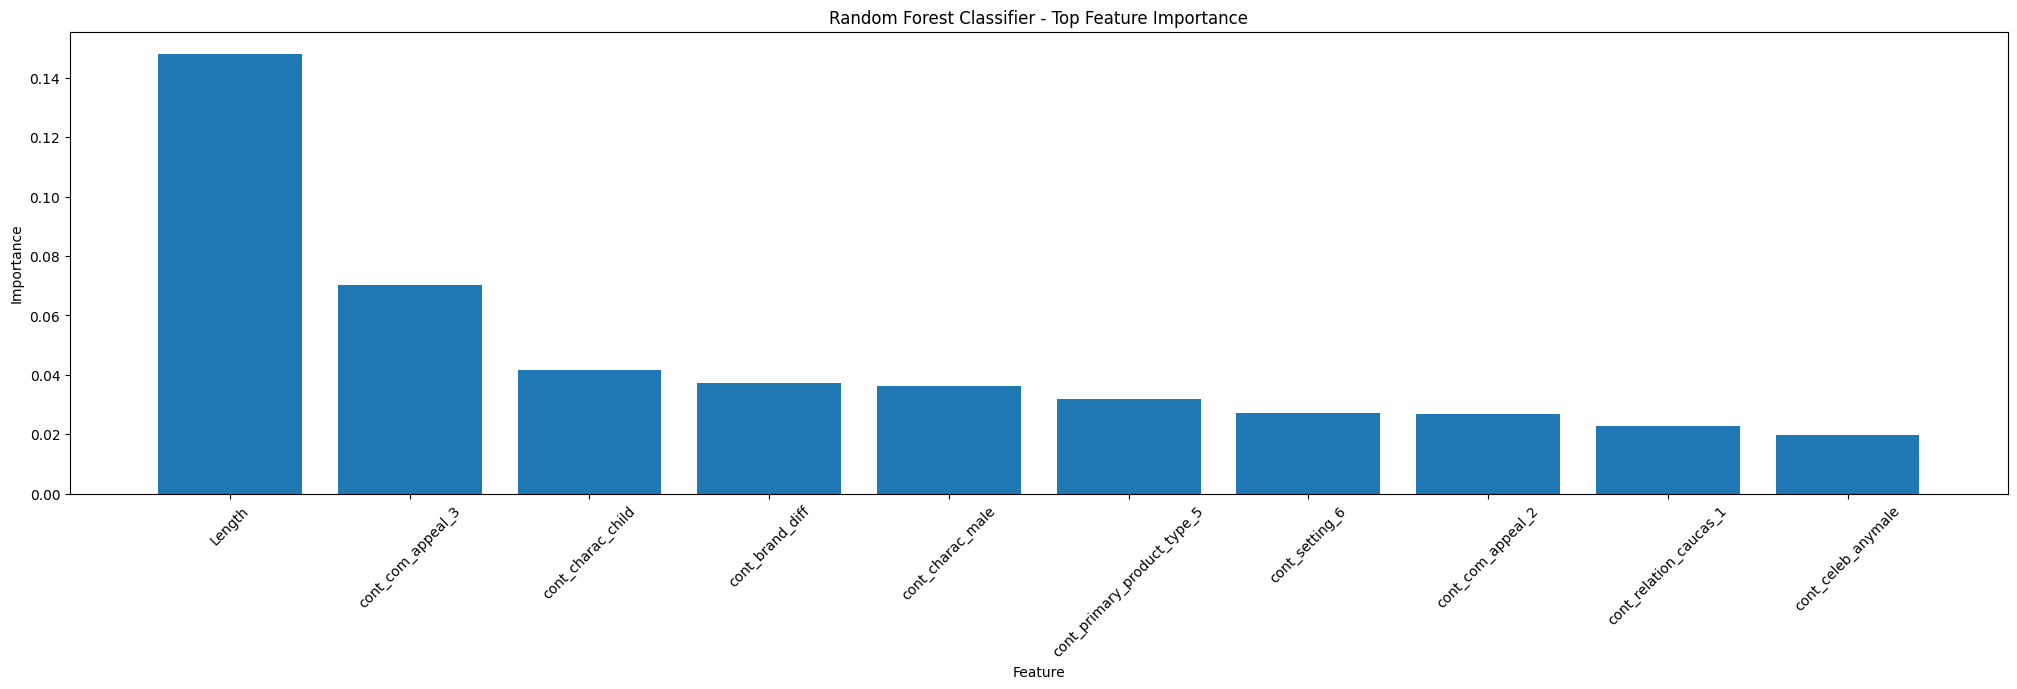

In [ ]:
important_attributes(X_manual, y_manual, best_params_manual)

### 4.3.3 New inserted attributes

Top Feature Importance:
1. Feature: compression_ratio_per_second, Importance: 17.0%
2. Feature: Acoustic_Complexity_Index__main_value, Importance: 12.0%
3. Feature: neutral_count, Importance: 4.0%
4. Feature: Total_Speaking_Time_Percent, Importance: 3.0%
5. Feature: person_count, Importance: 3.0%
6. Feature: white_avg_object_propotion, Importance: 3.0%
7. Feature: car_avg_object_propotion, Importance: 3.0%
8. Feature: Man_count, Importance: 2.0%
9. Feature: h_std, Importance: 2.0%
10. Feature: horse_avg_object_propotion, Importance: 2.0%


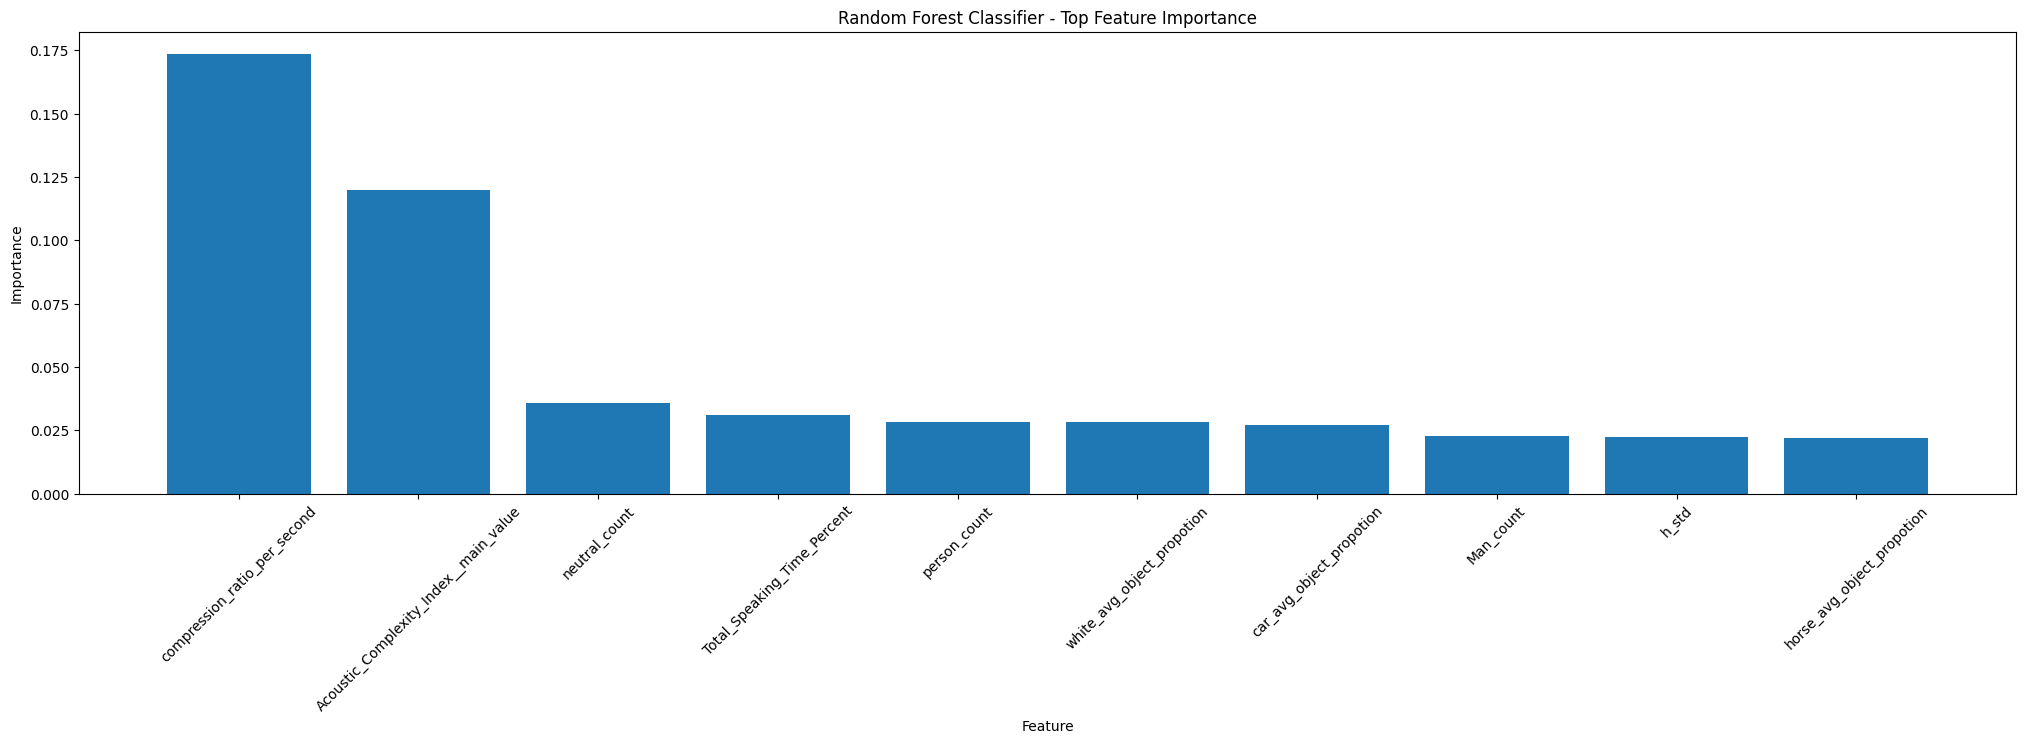

In [ ]:
important_attributes(X_project, y_project, best_params_project)

### 4.3.4 Combination of all

Top Feature Importance:
1. Feature: compression_ratio_per_second, Importance: 6.0%
2. Feature: Length, Importance: 5.0%
3. Feature: Acoustic_Complexity_Index__main_value, Importance: 5.0%
4. Feature: Man_count, Importance: 3.0%
5. Feature: car_count, Importance: 2.0%
6. Feature: cont_com_appeal_3, Importance: 2.0%
7. Feature: person_frame_ratio, Importance: 2.0%
8. Feature: Female_Speaking_Time_Percent, Importance: 2.0%
9. Feature: h_std, Importance: 2.0%
10. Feature: RMS_energy__mean, Importance: 2.0%


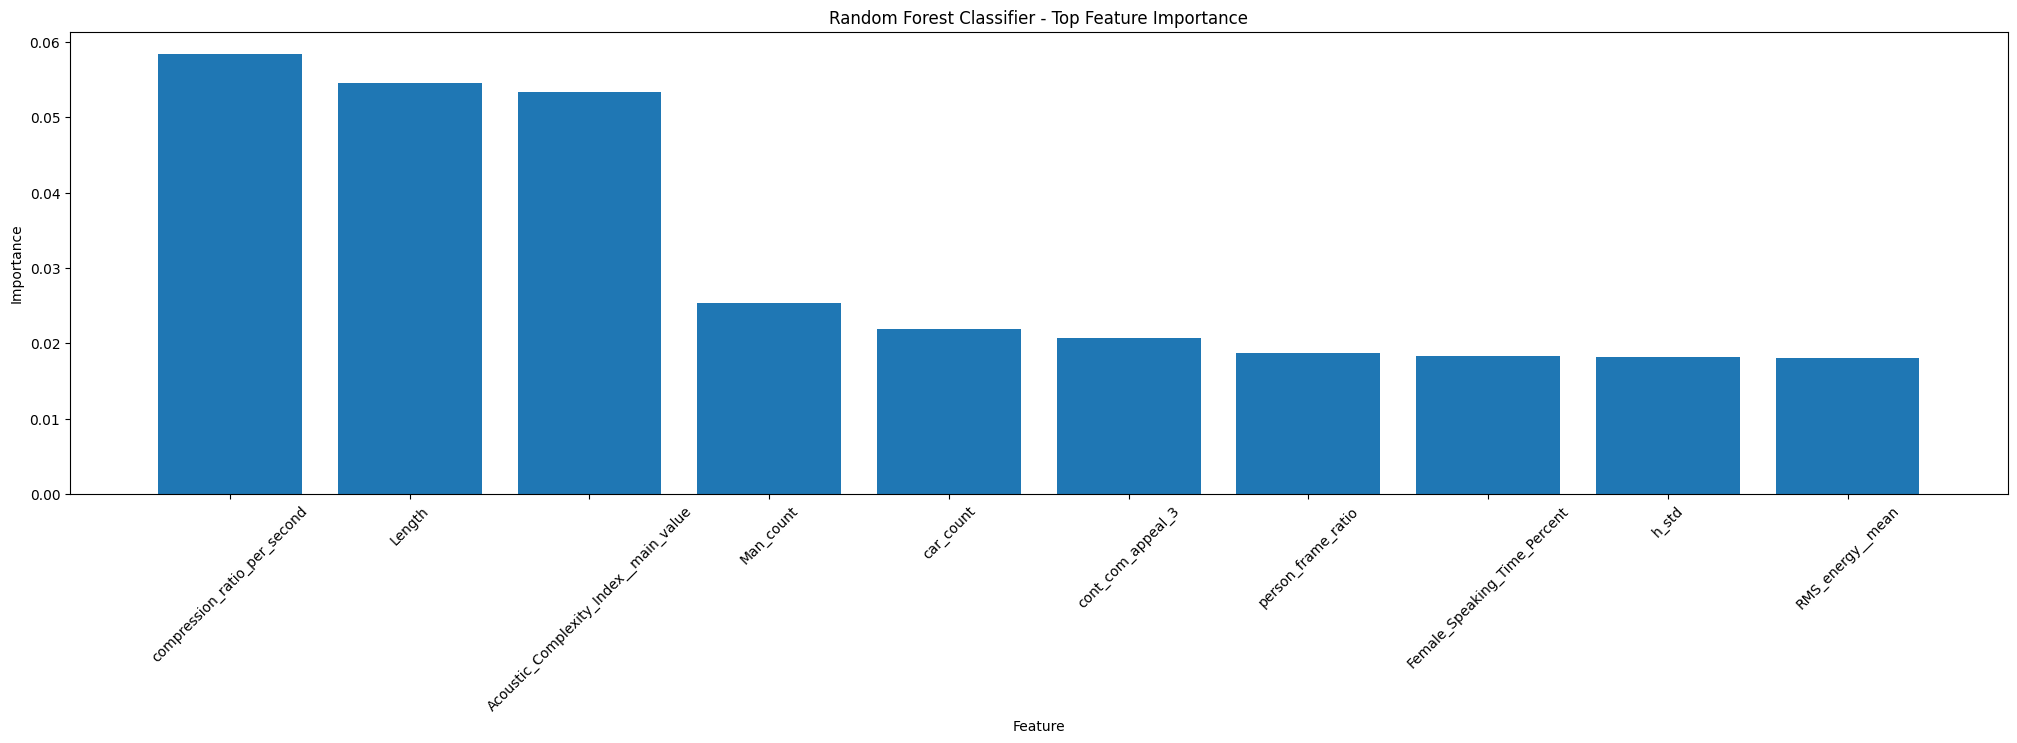

In [ ]:
important_attributes(X_all, y_all, best_params_all)

# 5. Evaluation

## 5.1 RF

In [ ]:
def random_forest_classifier(X, y, best_params):
    # Create and train the Random Forest Classifier with best hyperparameters
    rf_classifier = RandomForestClassifier(
        n_estimators=best_params.get('n_estimators'),
        max_depth=best_params.get('max_depth'),
        min_samples_split=best_params.get('min_samples_split'),
        max_features=best_params.get('max_features'),
        bootstrap=best_params.get('bootstrap'),
        criterion=best_params.get('criterion'),
        random_state=42)

    # Perform cross-validation and calculate mean scores
    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    scoring_metrics = {
        'Accuracy': make_scorer(accuracy_score),
        'Precision': make_scorer(precision_score, average='weighted', zero_division=1),
        'Recall': make_scorer(recall_score, average='weighted', zero_division=1),
        'F1-Score': make_scorer(f1_score, average='weighted')
    }

    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(rf_classifier, X, y, cv=cv, scoring=scorer)
        mean_score = np.mean(scores)
        print(f'{metric_name}: {round(mean_score, 6) * 100} %')

In [ ]:
random_forest_classifier(X_manual, y_manual, best_params_manual)

Accuracy: 49.5178 %
Precision: 64.897 %
Recall: 49.5178 %
F1-Score: 42.3939 %


In [ ]:
random_forest_classifier(X_project, y_project, best_params_project)

Accuracy: 50.122299999999996 %
Precision: 64.5296 %
Recall: 50.122299999999996 %
F1-Score: 43.460100000000004 %


In [ ]:
random_forest_classifier(X_all, y_all, best_params_all)

Accuracy: 50.6744 %
Precision: 66.0398 %
Recall: 50.6744 %
F1-Score: 43.3159 %


## 5.1 Baseline Model (Majority Classifier)

In [ ]:
# Define Majority Class
majority_class_value = data['USATodayAdMeter'].mode().iloc[0]
print("Majority Class Value:", majority_class_value)

# Calculate accuracy
predicted_values = [majority_class_value] * len(data['USATodayAdMeter'])
actual_values = data['USATodayAdMeter']
accuracy = sum(predicted_values == actual_values) / len(actual_values)

print(f"Accuracy: {round(accuracy*100, 2)}%")

Majority Class Value: 6
Accuracy: 37.52%
